https://www.kaggle.com/uciml/glass/home

# let's import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score
import collections

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# let's extract dataset

In [2]:
data = pd.read_csv('glass.csv')
data.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [8]:
data.isna().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

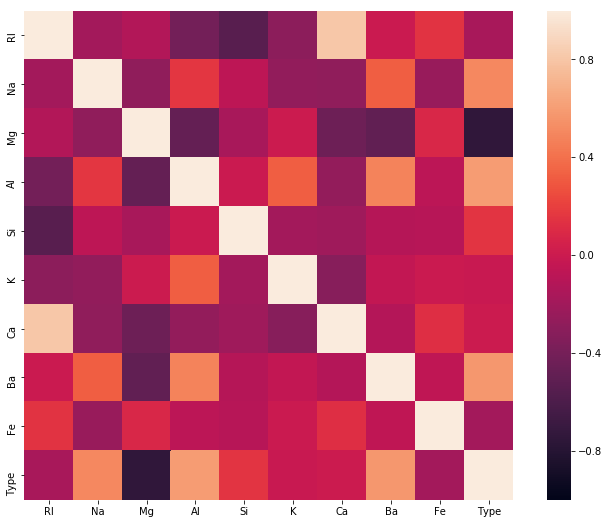

In [12]:
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmin=-1.0, vmax=1.0, square=True)

# Попробуем KNN

In [3]:
Y = data.Type
X = data.drop(['Type'], axis = 1)
size = 0.2
seed = 10

X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=size,random_state=seed)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

nbrs = KNeighborsClassifier().fit(X_train, Y_train)

In [32]:
accuracy_score(Y_validation, nbrs.predict(X_validation))

0.5348837209302325

In [35]:
from sklearn.metrics import f1_score

f1_score(Y_validation, nbrs.predict(X_validation), average='weighted')

0.5420819490586931

Попробуем рассмотреть классы по отдельности

In [92]:
data.groupby('Type').size()

Type
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64

Классы несбалансированы

In [8]:
from sklearn.preprocessing import label_binarize

classes = [1, 2, 3, 5, 6, 7]

Y_train_bin = label_binarize(Y_train, classes=classes)
Y_validation_bin = label_binarize(Y_validation, classes=classes) 

In [88]:
for i in range(0, 6):
    print("Label " + str(classes[i]) + ":")
    nbrs = KNeighborsClassifier().fit(X_train, Y_train_bin[:, i])
    print("Accuracy: " + str(accuracy_score(Y_validation_bin[:, i], nbrs.predict(X_validation))))
    print("F1: " + str(f1_score(Y_validation_bin[:, i], nbrs.predict(X_validation))))
    print()

Label 1:
Accuracy: 0.7209302325581395
F1: 0.5714285714285714

Label 2:
Accuracy: 0.7441860465116279
F1: 0.6206896551724138

Label 3:
Accuracy: 0.8837209302325582
F1: 0.28571428571428575

Label 5:
Accuracy: 0.9534883720930233
F1: 0.5

Label 6:
Accuracy: 0.8837209302325582
F1: 0.0

Label 7:
Accuracy: 0.9302325581395349
F1: 0.6666666666666665



Еще раз доказали, что accuracy ни о чем не говорит в случае несбалансированности классов. Согласно метрике F1 модель очень плоха. Хуже всех классы 3 и 6.

In [24]:
def plot_roc_auc(fpr, tpr, roc_auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Label: 1


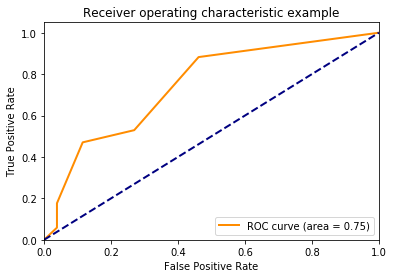

Label: 2


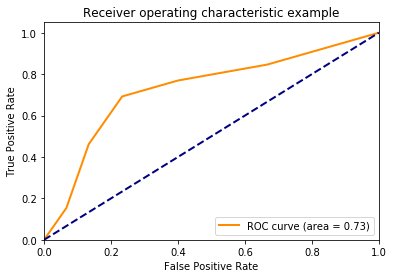

Label: 3


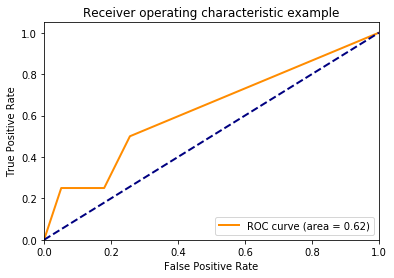

Label: 5


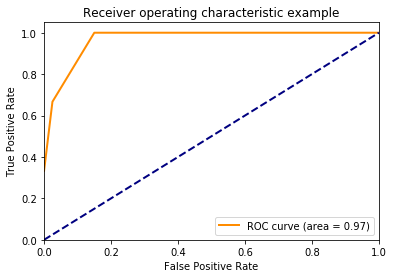

Label: 6


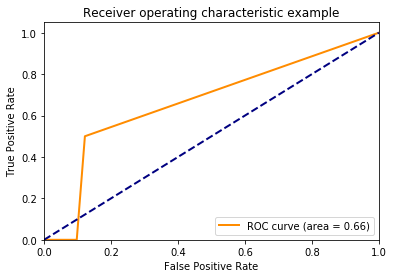

Label: 7


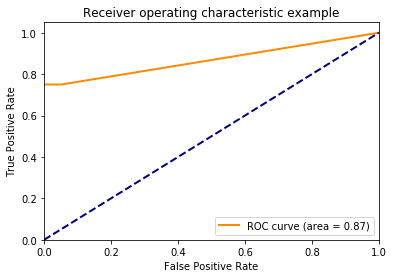

In [93]:
for i in range(0, 6):
    nbrs = KNeighborsClassifier().fit(X_train, Y_train_bin[:, i])
    fpr, tpr, _ = roc_curve(Y_validation_bin[:, i], nbrs.predict_proba(X_validation)[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("Label: " + str(classes[i]))
    plot_roc_auc(fpr, tpr, roc_auc)

В случае, если выдавать в качесте ответа веротяность пренадлежности классу, то модель выглядит намного лучше, хотя классы 3 и 6 предсказываются не слишком хорошо, снова. Если бы нужно было отделять класс 5 от всех остальных, то эта модель бы подошла.

# Попробуем логистическую регрессию

In [10]:
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits = 4, random_state = seed)

for i in range(0, 6):
    print("Label " + str(classes[i]) + ":")
    cv_res = cross_val_score(LogisticRegression(), X_train, Y_train_bin[:, i], cv=kfold, scoring = 'f1', n_jobs=-1)
    print(cv_res.mean(), cv_res.std())

Label 1:
0.4688293028810271 0.11588557341515836
Label 2:
0.310322286409243 0.05456181308833113
Label 3:
0.0 0.0
Label 5:
0.1 0.17320508075688776
Label 6:
0.16666666666666666 0.2886751345948129
Label 7:
0.8565934065934065 0.08860135016633865


Пожалуй, приемлимо отделяется только класс 7.

Label: 1


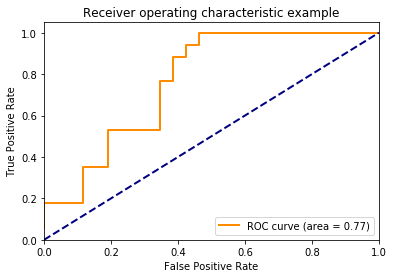

Label: 2


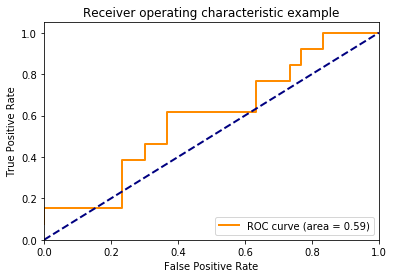

Label: 3


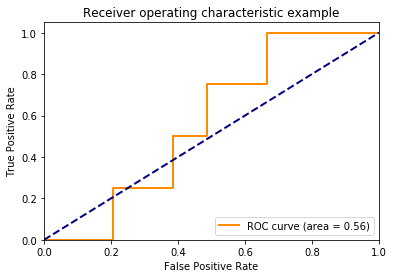

Label: 5


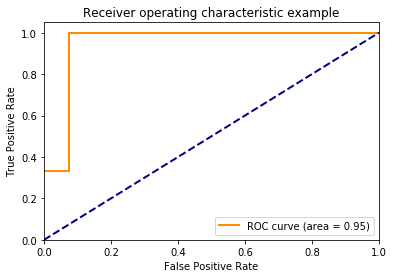

Label: 6


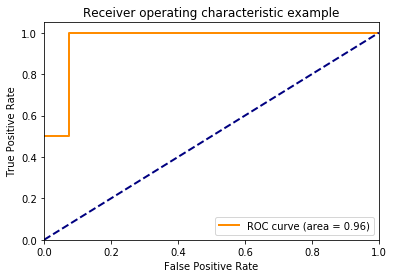

Label: 7


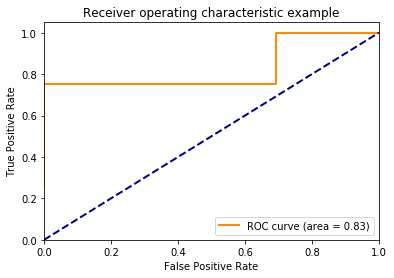

In [111]:
for i in range(0, 6):
    lr = LogisticRegression().fit(X_train, Y_train_bin[:, i])
    fpr, tpr, _ = roc_curve(Y_validation_bin[:, i], lr.predict_proba(X_validation)[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("Label: " + str(classes[i]))
    plot_roc_auc(fpr, tpr, roc_auc)

Видим, что в  случае если будет выдавть ответы в виде вероятностей, то будем хорошо отделять 5, 6 и 7 классы.

In [110]:
C = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])

grid_p = dict(C = C)
grid_cv = GridSearchCV(estimator = LogisticRegression(), param_grid = grid_p, scoring = 'f1', cv = kfold, n_jobs=-1)

for i in range(0, 6):
    print("Label " + str(classes[i]) + ":")
    grid_res = grid_cv.fit(X_train, Y_train_bin[:, i])

    means = grid_res.cv_results_['mean_test_score']
    stds = grid_res.cv_results_['std_test_score']
    params = grid_res.cv_results_['params']
    
    for m,s,p in zip(means,stds,params):
        print(p,m,s)
    print()

Label 1:
{'C': 0.2} 0.3039701232629374 0.09548501169780964
{'C': 0.4} 0.3843104913280352 0.1479234780917973
{'C': 0.6} 0.3919762931458838 0.14302320701424998
{'C': 0.8} 0.4129715426330277 0.13932071965593626
{'C': 1.0} 0.4681596886678556 0.11589166970034401
{'C': 1.2} 0.4624286945158089 0.11050628507351243
{'C': 1.4} 0.48202313516288114 0.08018289392339023
{'C': 1.6} 0.47712051341815404 0.10797706323162373
{'C': 1.8} 0.47712051341815404 0.10797706323162373
{'C': 2.0} 0.4940498098392835 0.11375319955729983

Label 2:
{'C': 0.2} 0.14803591470258137 0.10927437088014648
{'C': 0.4} 0.22465143975441457 0.09517585759609203
{'C': 0.6} 0.25718732492187873 0.10857242464830738
{'C': 0.8} 0.31705922689904387 0.0553725987678674
{'C': 1.0} 0.3106114836091953 0.054589518505636765
{'C': 1.2} 0.3106114836091953 0.054589518505636765
{'C': 1.4} 0.3307284426735228 0.0882107162647328
{'C': 1.6} 0.34332680531510945 0.10254164760408764
{'C': 1.8} 0.3511050353155616 0.09293858851598504
{'C': 2.0} 0.35110503531

In [114]:
for i in range(0, 6):
    print("Label " + str(classes[i]) + ":")
    lr = LogisticRegression(C=2.0).fit(X_train, Y_train_bin[:, i])
    print(f1_score(Y_validation_bin[:, i], lr.predict(X_validation), pos_label=1))
    print(lr.coef_)

Label 1:
0.2608695652173913
[[-0.03581098 -0.98054075  1.64636006 -2.50115288  0.12051235 -0.17928609
   0.17140739  0.52379739 -0.99066056]]
Label 2:
0.1904761904761905
[[ 0.07776468 -0.64584339  0.49395931  0.98407378  0.0342755  -0.01847096
   0.29155285 -0.69011168  1.3524966 ]]
Label 3:
0.0
[[-0.01421764  0.79612452  0.938609    0.05890782 -0.22608741 -0.36908854
   0.04139376 -0.85105063 -0.08661682]]
Label 5:
0.4
[[ 0.02010564 -0.82858775 -0.48335426  2.57710152 -0.00344533  1.25087269
   0.48571654 -1.15701497 -0.69020963]]
Label 6:
0.0
[[-0.06218334  1.30133696 -0.28624019  0.31157227 -0.28034249 -1.96609695
   0.04741087 -2.28928907 -0.32072274]]
Label 7:
0.8571428571428571
[[-0.02037333  0.23700675 -1.32408197  0.85030854  0.05148581 -0.59526749
  -0.89075832  1.19549701 -0.28757993]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Параметр регулярзации погоду не делает. Коэффициенты в порядке. Можно конечно все равно попробовать отмасштабировать признаки.

# Отмасштабируем признаки

In [4]:
from sklearn.preprocessing import MinMaxScaler
def transform_df(train, test):
    united = train.append(test)
    scaler = MinMaxScaler()
    scaler.fit(united)
    transformed = scaler.transform(united)
    return transformed[:train.shape[0]], transformed[train.shape[0]:]

In [5]:
train_tr, test_tr = transform_df(X_train, X_validation)

Label: 1


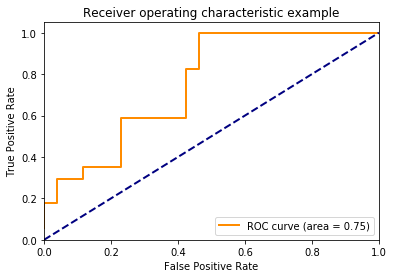

Label: 2


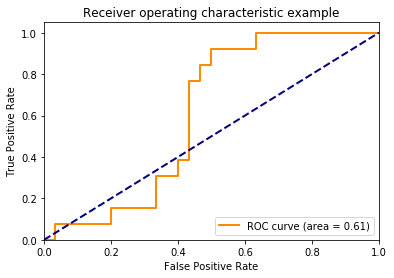

Label: 3


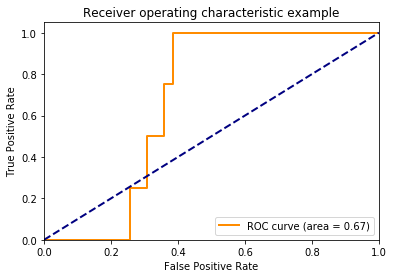

Label: 5


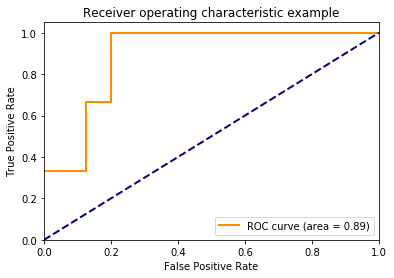

Label: 6


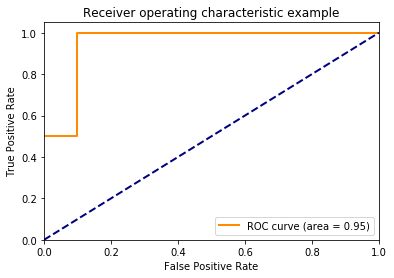

Label: 7


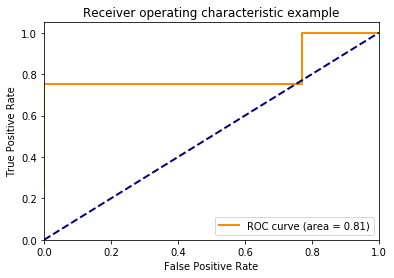

In [122]:
for i in range(0, 6):
    lr = LogisticRegression().fit(train_tr, Y_train_bin[:, i])
    fpr, tpr, _ = roc_curve(Y_validation_bin[:, i], lr.predict_proba(test_tr)[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("Label: " + str(classes[i]))
    plot_roc_auc(fpr, tpr, roc_auc)

Примерно все так же и осталось

# Попробуем SVM

In [6]:
from sklearn.svm import SVC

In [15]:
for i in range(0, 6):
    print("Label " + str(classes[i]) + ":")
    cv_res = cross_val_score(SVC(), X_train, Y_train_bin[:, i], cv=kfold, scoring = 'f1', n_jobs=-1)
    print(cv_res.mean(), cv_res.std())

Label 1:
0.4200876522857947 0.1475174012432871
Label 2:
0.6650345622119817 0.106774156187336
Label 3:
0.0 0.0
Label 5:
0.16666666666666666 0.2886751345948129
Label 6:
0.0 0.0
Label 7:
0.8649267399267399 0.08435229185628595


In [14]:
for i in range(0, 6):
    print("Label " + str(classes[i]) + ":")
    cv_res = cross_val_score(SVC(kernel='linear'), X_train, Y_train_bin[:, i], cv=kfold, scoring = 'f1', n_jobs=-1)
    print(cv_res.mean(), cv_res.std())

Label 1:
0.4361909536541889 0.1442468044158693
Label 2:
0.1067251461988304 0.12894537930597733
Label 3:
0.0 0.0
Label 5:
0.1 0.17320508075688776
Label 6:
0.0 0.0
Label 7:
0.8428571428571429 0.10400156984686454


In [13]:
for i in range(0, 6):
    print("Label " + str(classes[i]) + ":")
    cv_res = cross_val_score(SVC(), train_tr, Y_train_bin[:, i], cv=kfold, scoring = 'f1', n_jobs=-1)
    print(cv_res.mean(), cv_res.std())

Label 1:
0.0 0.0
Label 2:
0.0 0.0
Label 3:
0.0 0.0
Label 5:
0.0 0.0
Label 6:
0.0 0.0
Label 7:
0.715034965034965 0.1881869374818533


In [16]:
for i in range(0, 6):
    print("Label " + str(classes[i]) + ":")
    cv_res = cross_val_score(SVC(kernel='linear'), train_tr, Y_train_bin[:, i], cv=kfold, scoring = 'f1', n_jobs=-1)
    print(cv_res.mean(), cv_res.std())

Label 1:
0.03846153846153846 0.06661733875264911
Label 2:
0.0625 0.10825317547305482
Label 3:
0.0 0.0
Label 5:
0.0 0.0
Label 6:
0.0 0.0
Label 7:
0.8303571428571429 0.1111598178391851


Видим, что метод опорных векторов очень плохо справляется с поставленой задачей. Хорошо отделяется только класс 7. И что-то масштабирование признаков нам никак не помогло...

# Попробуем Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
n_estimators = np.array([50,100,200,250])
max_features = np.array([1,3,5,None])

grid_p = dict(n_estimators = n_estimators, max_features = max_features)
md = RandomForestClassifier()
kfold = KFold(4, random_state = 10)

for i in range(0, 6):
    print("Label " + str(classes[i]) + ":")

    grid_cv = GridSearchCV(estimator = md, param_grid = grid_p, scoring = 'f1', cv = kfold, n_jobs=-1)
    grid_res = grid_cv.fit(X_train, Y_train_bin[:, i])

    means = grid_res.cv_results_['mean_test_score']
    stds = grid_res.cv_results_['std_test_score']
    params = grid_res.cv_results_['params']
    
    for m,s,p in zip(means,stds,params):
        print(p,m,s)
    print()

Label 1:
{'max_features': 1, 'n_estimators': 50} 0.7401356817914698 0.09729424939098623
{'max_features': 1, 'n_estimators': 100} 0.7844464714029932 0.10330215661978415
{'max_features': 1, 'n_estimators': 200} 0.7780688122793386 0.11416729339895791
{'max_features': 1, 'n_estimators': 250} 0.7780688122793386 0.11416729339895791
{'max_features': 3, 'n_estimators': 50} 0.754218023691708 0.10217215619019594
{'max_features': 3, 'n_estimators': 100} 0.7665608465608467 0.08231525587244641
{'max_features': 3, 'n_estimators': 200} 0.7739010361151923 0.09171083002281727
{'max_features': 3, 'n_estimators': 250} 0.7590943521673571 0.09460142236579917
{'max_features': 5, 'n_estimators': 50} 0.7933577793226916 0.08532742678065795
{'max_features': 5, 'n_estimators': 100} 0.7641880693663375 0.12249535237557257
{'max_features': 5, 'n_estimators': 200} 0.7767983337493319 0.10027206489525498
{'max_features': 5, 'n_estimators': 250} 0.8034732481252006 0.06313841173777236
{'max_features': None, 'n_estimator

Label: 1


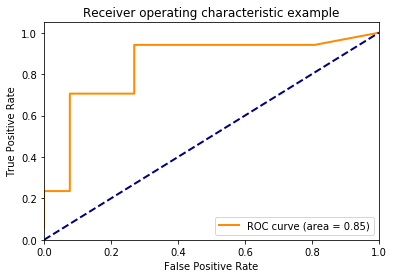

Label: 2


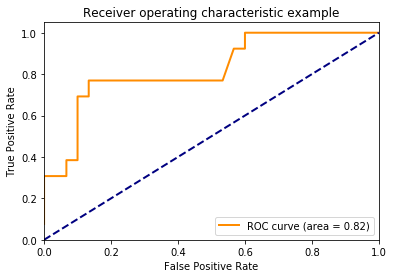

Label: 3


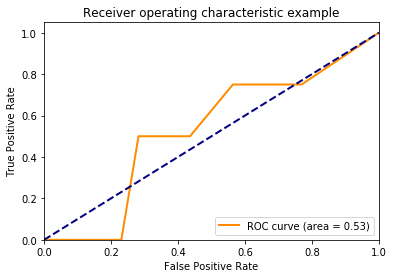

Label: 5


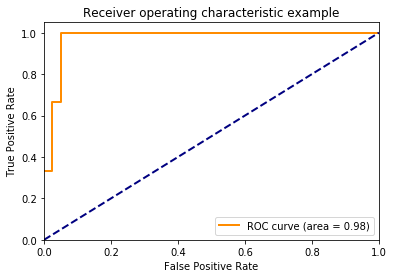

Label: 6


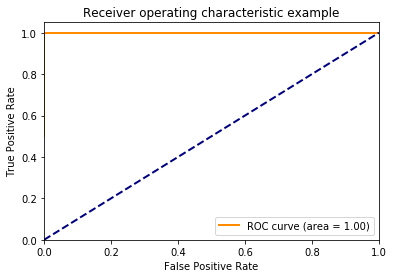

Label: 7


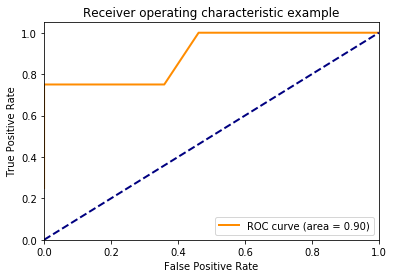

In [33]:
lr = RandomForestClassifier(n_estimators=250, max_features=5).fit(X_train, Y_train_bin[:, 0])
fpr, tpr, _ = roc_curve(Y_validation_bin[:, 0], lr.predict_proba(X_validation)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("Label: " + str(classes[0]))
plot_roc_auc(fpr, tpr, roc_auc)

lr = RandomForestClassifier(n_estimators=250, max_features=3).fit(X_train, Y_train_bin[:, 1])
fpr, tpr, _ = roc_curve(Y_validation_bin[:, 1], lr.predict_proba(X_validation)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("Label: " + str(classes[1]))
plot_roc_auc(fpr, tpr, roc_auc)

lr = RandomForestClassifier(n_estimators=50, max_features=3).fit(X_train, Y_train_bin[:, 2])
fpr, tpr, _ = roc_curve(Y_validation_bin[:, 2], lr.predict_proba(X_validation)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("Label: " + str(classes[2]))
plot_roc_auc(fpr, tpr, roc_auc)

lr = RandomForestClassifier(n_estimators=200, max_features=5).fit(X_train, Y_train_bin[:, 3])
fpr, tpr, _ = roc_curve(Y_validation_bin[:, 3], lr.predict_proba(X_validation)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("Label: " + str(classes[3]))
plot_roc_auc(fpr, tpr, roc_auc)

lr = RandomForestClassifier(n_estimators=250, max_features=5).fit(X_train, Y_train_bin[:, 4])
fpr, tpr, _ = roc_curve(Y_validation_bin[:, 4], lr.predict_proba(X_validation)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("Label: " + str(classes[4]))
plot_roc_auc(fpr, tpr, roc_auc)

lr = RandomForestClassifier(n_estimators=250).fit(X_train, Y_train_bin[:, 5])
fpr, tpr, _ = roc_curve(Y_validation_bin[:, 5], lr.predict_proba(X_validation)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("Label: " + str(classes[5]))
plot_roc_auc(fpr, tpr, roc_auc)

Деревья показали себя лучше всех предыдщих моделей, можно обратить внимание, что площадь кривой для 5-го класса близка 1, а 6 вообще 1. Класс 3 отделяется очень плохо.

# Попробуем Gradient Boosting Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
n_estimators = np.array([10,50,100,200,500])
max_features = np.array([1,3,5,None])

grid_p = dict(n_estimators = n_estimators, max_features = max_features)
gb = GradientBoostingClassifier()
kfold = KFold(4, random_state = 10)

for i in range(0, 6):
    print("Label " + str(classes[i]) + ":")

    grid_cv = GridSearchCV(estimator = gb, param_grid = grid_p, scoring = 'f1', cv = kfold, n_jobs=-1)
    grid_res = grid_cv.fit(X_train, Y_train_bin[:, i])

    means = grid_res.cv_results_['mean_test_score']
    stds = grid_res.cv_results_['std_test_score']
    params = grid_res.cv_results_['params']
    
    for m,s,p in zip(means,stds,params):
        print(p,m,s)
    print()

Label 1:
{'max_features': 1, 'n_estimators': 10} 0.34871084594076285 0.2648239207825584
{'max_features': 1, 'n_estimators': 50} 0.7298633936620206 0.09118509345069281
{'max_features': 1, 'n_estimators': 100} 0.7147916086512577 0.14656951117372205
{'max_features': 1, 'n_estimators': 200} 0.724303241177416 0.13713340574599564
{'max_features': 1, 'n_estimators': 500} 0.7447786131996659 0.12421133782649725
{'max_features': 3, 'n_estimators': 10} 0.5895723058194454 0.10876188501062456
{'max_features': 3, 'n_estimators': 50} 0.7463374485596709 0.09578622716600549
{'max_features': 3, 'n_estimators': 100} 0.7830704530775549 0.07247930484810848
{'max_features': 3, 'n_estimators': 200} 0.7985055638050192 0.12031583451024701
{'max_features': 3, 'n_estimators': 500} 0.7378084337148665 0.10015177869602057
{'max_features': 5, 'n_estimators': 10} 0.6285098634450275 0.11463836650972646
{'max_features': 5, 'n_estimators': 50} 0.7277106346112194 0.08750301018353546
{'max_features': 5, 'n_estimators': 10

Label: 1


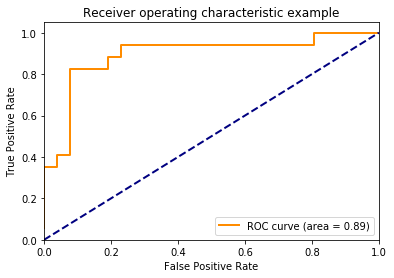

Label: 2


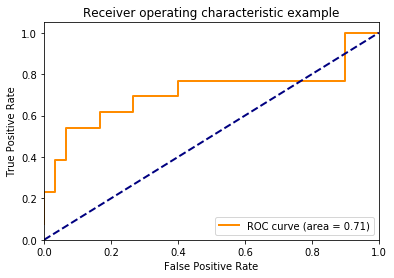

Label: 3


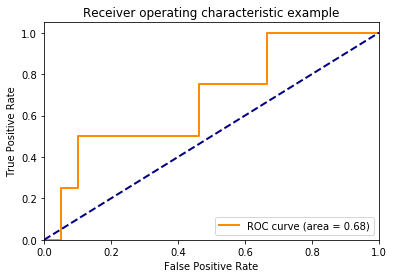

Label: 5


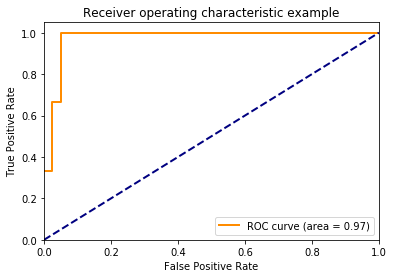

Label: 6


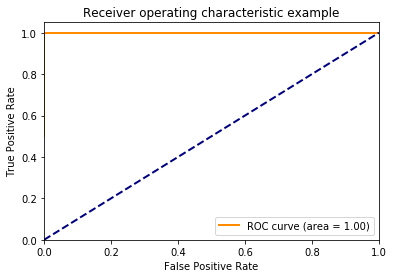

Label: 7


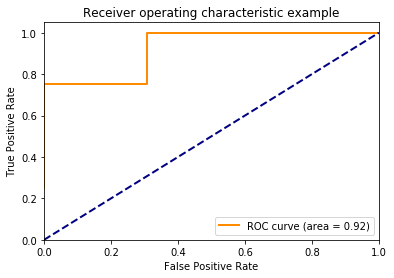

In [35]:
gb = GradientBoostingClassifier(n_estimators=200, max_features=3).fit(X_train, Y_train_bin[:, 0])
fpr, tpr, _ = roc_curve(Y_validation_bin[:, 0], gb.predict_proba(X_validation)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("Label: " + str(classes[0]))
plot_roc_auc(fpr, tpr, roc_auc)

gb = GradientBoostingClassifier(n_estimators=500, max_features=1).fit(X_train, Y_train_bin[:, 1])
fpr, tpr, _ = roc_curve(Y_validation_bin[:, 1], gb.predict_proba(X_validation)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("Label: " + str(classes[1]))
plot_roc_auc(fpr, tpr, roc_auc)

gb = GradientBoostingClassifier(n_estimators=200, max_features=1).fit(X_train, Y_train_bin[:, 2])
fpr, tpr, _ = roc_curve(Y_validation_bin[:, 2], gb.predict_proba(X_validation)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("Label: " + str(classes[2]))
plot_roc_auc(fpr, tpr, roc_auc)

gb = GradientBoostingClassifier(n_estimators=500, max_features=3).fit(X_train, Y_train_bin[:, 3])
fpr, tpr, _ = roc_curve(Y_validation_bin[:, 3], gb.predict_proba(X_validation)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("Label: " + str(classes[3]))
plot_roc_auc(fpr, tpr, roc_auc)

gb = GradientBoostingClassifier(n_estimators=50, max_features=5).fit(X_train, Y_train_bin[:, 4])
fpr, tpr, _ = roc_curve(Y_validation_bin[:, 4], gb.predict_proba(X_validation)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("Label: " + str(classes[4]))
plot_roc_auc(fpr, tpr, roc_auc)

gb = GradientBoostingClassifier(n_estimators=200, max_features=1).fit(X_train, Y_train_bin[:, 5])
fpr, tpr, _ = roc_curve(Y_validation_bin[:, 5], gb.predict_proba(X_validation)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print("Label: " + str(classes[5]))
plot_roc_auc(fpr, tpr, roc_auc)

Результаты немного лучше чем у случайного леса

# Выводы

Из всех алгоритмов классификации лучше всех показали себя случайный лес и градиентный бустинг. Один из недостатов данного датасета является его малый размер, возможно поэтому не все алгоритмы хорошо обучились.